# Introducing: 

## Source:
https://www.kaggle.com/competitions/GiveMeSomeCredit/overview

## Context: 
Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years.

The goal of this competition is to build a model that borrowers can use to help make the best financial decisions.

Historical data are provided on 250,000 borrowers and the prize pool is $5,000 ($3,000 for first, $1,500 for second and $500 for third).

## Task: 
Predict probability

## Used libraries:
- pandas
- numpy
- matplotlib
- optuna
- sklearn
- xgboost
- catboost

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import optuna
from optuna.visualization.matplotlib import plot_param_importances

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Data Preparation

## Format Data:

In [2]:
df = pd.read_csv('cs-training.csv')
df

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [3]:
df.drop('Unnamed: 0', axis = 1,inplace=True)

In [4]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
df.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [6]:
df.shape

(150000, 11)

In [7]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## Skips, Nans:

In [8]:
df.isna().mean().sort_values(ascending=False)

MonthlyIncome                           0.198207
NumberOfDependents                      0.026160
SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
dtype: float64

In [9]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean(), inplace=True)

In [10]:
df['NumberOfDependents'].value_counts()

NumberOfDependents
0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
10.0        5
9.0         5
20.0        1
13.0        1
Name: count, dtype: int64

In [11]:
df['NumberOfDependents'].fillna(0, inplace=True)

In [12]:
df.isna().mean().sort_values(ascending=False)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

# Features Engineering:

In [13]:
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.000000,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.000000,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,6670.221237,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.000000,4,0,0,0,0.0


## Define X and y

In [14]:
df['SeriousDlqin2yrs'].reset_index()

,index,SeriousDlqin2yrs
0,0,1
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
149995,149995,0
149996,149996,0
149997,149997,0
149998,149998,0


In [15]:
X = df.drop("SeriousDlqin2yrs", axis = 1)
y = df["SeriousDlqin2yrs"]

In [16]:
X

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45,2,0.802982,9120.000000,13,0,6,0,2.0
1,0.957151,40,0,0.121876,2600.000000,4,0,0,0,1.0
2,0.658180,38,1,0.085113,3042.000000,2,1,0,0,0.0
3,0.233810,30,0,0.036050,3300.000000,5,0,0,0,0.0
4,0.907239,49,1,0.024926,63588.000000,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
149995,0.040674,74,0,0.225131,2100.000000,4,0,1,0,0.0
149996,0.299745,44,0,0.716562,5584.000000,4,0,1,0,2.0
149997,0.246044,58,0,3870.000000,6670.221237,18,0,1,0,0.0
149998,0.000000,30,0,0.000000,5716.000000,4,0,0,0,0.0


In [17]:
y

0         1
1         0
2         0
3         0
4         0
         ..
149995    0
149996    0
149997    0
149998    0
149999    0
Name: SeriousDlqin2yrs, Length: 150000, dtype: int64

## Split the datasets into train and test sets:
- train 80%
- test 20%

### Split the datasets into train and test sets:
- train 80%
- test 20%

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [19]:
len(X_train) / len(df)

0.8

In [20]:
len(X_test) / len(df)

0.2

In [21]:
X_train.dtypes

RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [22]:
X_train

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
104025,0.000000,29,0,0.011513,4342.000000,5,0,0,0,0.0
5415,0.595526,55,0,0.835333,1833.000000,11,0,1,0,0.0
75612,0.000000,43,0,0.043437,4166.000000,2,0,0,0,4.0
138169,0.391980,40,0,0.059771,9000.000000,2,0,0,0,5.0
87184,0.000000,35,0,0.133598,5800.000000,12,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...
119879,0.107445,72,0,0.899275,4000.000000,17,0,2,0,1.0
103694,0.087697,67,1,1781.000000,6670.221237,10,0,1,0,1.0
131932,0.068788,49,0,0.673331,2800.000000,8,0,2,0,0.0
146867,0.219630,36,0,0.025316,1500.000000,2,0,0,0,0.0


In [23]:
y_train

104025    0
5415      0
75612     0
138169    0
87184     0
         ..
119879    0
103694    0
131932    0
146867    0
121958    0
Name: SeriousDlqin2yrs, Length: 120000, dtype: int64

### Scales numerical columns:

In [24]:
X_train.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,120000.000000,120000.000000,120000.000000,120000.000000,1.200000e+05,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,5.632938,52.280558,0.422292,351.040018,6.676773e+03,8.460858,0.265758,1.019942,0.239683,0.738083
std,247.022022,14.762852,4.191649,1941.106682,1.370154e+04,5.146114,4.167864,1.132330,4.153510,1.107938
min,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030097,41.000000,0.000000,0.175554,3.901000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154848,52.000000,0.000000,0.367165,6.591000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.558904,63.000000,0.000000,0.866549,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,326442.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,13.000000


In [25]:
# Initiate scaler
sc = StandardScaler()

# Standardize the training dataset
X_train = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)

# Standardized the testing dataset
X_test = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)

# Summary statistics after standardization
X_train.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,1.200000e+05,1.200000e+05,1.200000e+05,1.200000e+05,1.200000e+05,1.200000e+05,1.200000e+05,1.200000e+05,1.200000e+05,1.200000e+05
mean,-5.921189e-18,1.081209e-16,-9.829175e-18,6.217249e-18,-1.661190e-16,1.505166e-16,-5.062617e-18,-7.170560e-17,1.640169e-17,-5.956717e-17
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-2.280348e-02,-2.118878e+00,-1.007464e-01,-1.808461e-01,-4.873029e-01,-1.644133e+00,-6.376394e-02,-9.007497e-01,-5.770645e-02,-6.661803e-01
25%,-2.268164e-02,-7.641210e-01,-1.007464e-01,-1.807556e-01,-2.025892e-01,-6.725216e-01,-6.376394e-02,-9.007497e-01,-5.770645e-02,-6.661803e-01
50%,-2.217662e-02,-1.900442e-02,-1.007464e-01,-1.806569e-01,-6.260113e-03,-8.955500e-02,-6.376394e-02,-1.761125e-02,-5.770645e-02,-6.661803e-01
75%,-2.054090e-02,7.261121e-01,-1.007464e-01,-1.803996e-01,5.278459e-02,4.934116e-01,-6.376394e-02,8.655272e-01,-5.770645e-02,2.364011e-01
max,2.052553e+02,3.842054e+00,2.327917e+01,1.679930e+02,2.191057e+02,9.626555e+00,2.344958e+01,4.678872e+01,2.353689e+01,1.106738e+01


In [26]:
X_train.dtypes

RevolvingUtilizationOfUnsecuredLines    float64
age                                     float64
NumberOfTime30-59DaysPastDueNotWorse    float64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans         float64
NumberOfTimes90DaysLate                 float64
NumberRealEstateLoansOrLines            float64
NumberOfTime60-89DaysPastDueNotWorse    float64
NumberOfDependents                      float64
dtype: object

## Define X and y:

# XGBoost:

## XGBoost default params:

In [27]:
xgb_model_1 = XGBClassifier()

In [28]:
%%time

xgb_model_1.fit(
          X_train,
          y_train,
          eval_set=[(X_test, y_test)],
)

[0]	validation_0-logloss:0.23790
[1]	validation_0-logloss:0.21686
[2]	validation_0-logloss:0.20334
[3]	validation_0-logloss:0.19440
[4]	validation_0-logloss:0.18832
[5]	validation_0-logloss:0.18430
[6]	validation_0-logloss:0.18169
[7]	validation_0-logloss:0.17982
[8]	validation_0-logloss:0.17866
[9]	validation_0-logloss:0.17765
[10]	validation_0-logloss:0.17716
[11]	validation_0-logloss:0.17685
[12]	validation_0-logloss:0.17660
[13]	validation_0-logloss:0.17643
[14]	validation_0-logloss:0.17641
[15]	validation_0-logloss:0.17646
[16]	validation_0-logloss:0.17638
[17]	validation_0-logloss:0.17628
[18]	validation_0-logloss:0.17625
[19]	validation_0-logloss:0.17625
[20]	validation_0-logloss:0.17631
[21]	validation_0-logloss:0.17640
[22]	validation_0-logloss:0.17634
[23]	validation_0-logloss:0.17649
[24]	validation_0-logloss:0.17651
[25]	validation_0-logloss:0.17656
[26]	validation_0-logloss:0.17649
[27]	validation_0-logloss:0.17651
[28]	validation_0-logloss:0.17662
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [29]:
y_pred1 = xgb_model_1.predict(X_test)

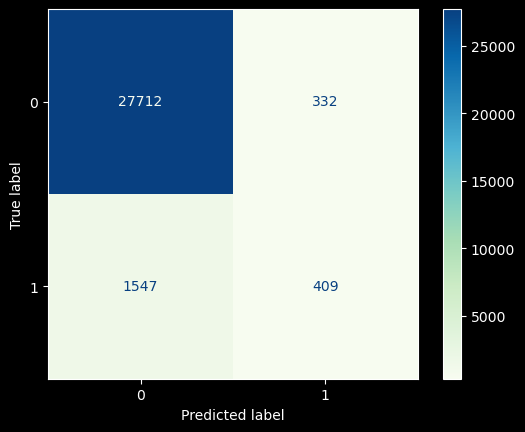

In [30]:
ConfusionMatrixDisplay.from_estimator(xgb_model_1, X_test, y_test, cmap='GnBu')
plt.show()

In [31]:
print('Precision: %.3f' % precision_score(y_test, y_pred1))
print('Recall: %.3f' % recall_score(y_test, y_pred1))
print('F1: %.3f' % f1_score(y_test, y_pred1))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred1))

Precision: 0.552
Recall: 0.209
F1: 0.303
Accuracy: 0.937


## xgb model 2, Optuna

In [32]:
def objective(trial):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
    }

    # Fit the model
    optuna_model = XGBClassifier(**params)
    optuna_model.fit(X_train, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [33]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [34]:
study = optuna.create_study(direction='maximize',study_name='XGBoost_optuna')

In [35]:
study.optimize(objective, n_trials=100, show_progress_bar=True)

  0%|          | 0/100 [00:00<?, ?it/s]

In [36]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))


Number of finished trials: 100
Best trial:
  Value: 0.9394666666666667
  Params: 
    max_depth: 3
    learning_rate: 0.08983946991637488
    n_estimators: 164
    min_child_weight: 9
    gamma: 0.27072481773603535
    subsample: 0.9350196790221443
    colsample_bytree: 0.5744933279154604
    reg_alpha: 0.157602714276269
    reg_lambda: 0.35232580779600847


In [37]:
trial.params

{'max_depth': 3,
 'learning_rate': 0.08983946991637488,
 'n_estimators': 164,
 'min_child_weight': 9,
 'gamma': 0.27072481773603535,
 'subsample': 0.9350196790221443,
 'colsample_bytree': 0.5744933279154604,
 'reg_alpha': 0.157602714276269,
 'reg_lambda': 0.35232580779600847}

/tmp/ipykernel_24812/2122237422.py:1: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  plot_param_importances(study);


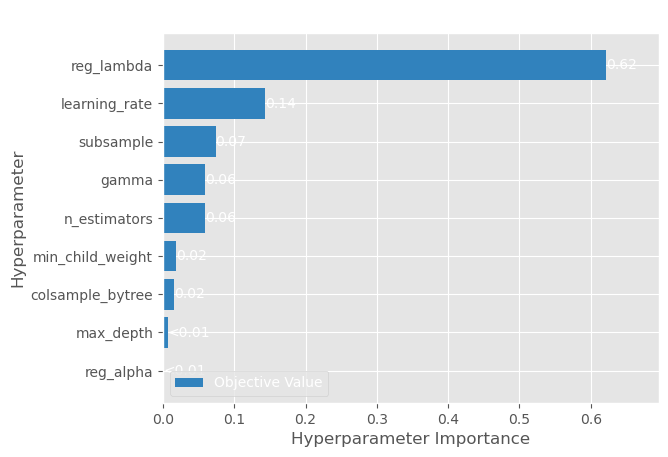

In [38]:
plot_param_importances(study);

In [39]:
params = trial.params

In [40]:
trial.params

{'max_depth': 3,
 'learning_rate': 0.08983946991637488,
 'n_estimators': 164,
 'min_child_weight': 9,
 'gamma': 0.27072481773603535,
 'subsample': 0.9350196790221443,
 'colsample_bytree': 0.5744933279154604,
 'reg_alpha': 0.157602714276269,
 'reg_lambda': 0.35232580779600847}

In [41]:
xgb_model_2 = XGBClassifier(**params)

In [42]:
xgb_model_2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5744933279154604, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.27072481773603535,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08983946991637488,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=9, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=164, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [43]:
y_pred2 = xgb_model_2.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy after tuning: %.2f%%" % (accuracy * 100.0))

Accuracy after tuning: 93.95%


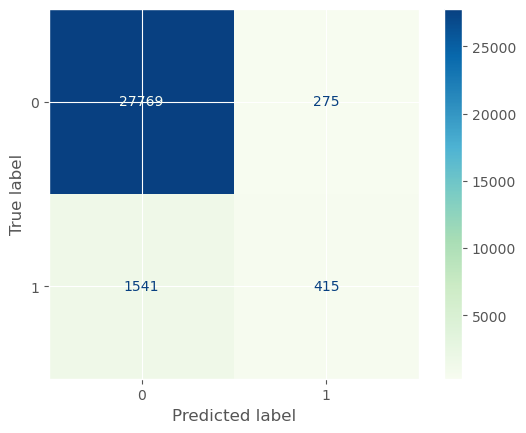

In [45]:
ConfusionMatrixDisplay.from_estimator(xgb_model_2, X_test, y_test, cmap='GnBu')
plt.show()

In [46]:
print('Precision: %.3f' % precision_score(y_test, y_pred2))
print('Recall: %.3f' % recall_score(y_test, y_pred2))
print('F1: %.3f' % f1_score(y_test, y_pred2))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred2))

Precision: 0.601
Recall: 0.212
F1: 0.314
Accuracy: 0.939


## xgb model 3

In [47]:
parameters = {
    'max_depth': 9,
    'learning_rate': 0.01,
    'n_estimators': 3000,
    'early_stopping_rounds': 30,
    'min_child_weight':1,
    'gamma': 0.75,
    'subsample':0.82,
    'colsample_bytree':0.84,
    'reg_alpha':0.52,
    'reg_lambda':0.44,
    'random_state':42
}

In [48]:
xgb_model_3 = XGBClassifier(**parameters)

In [49]:
xgb_model_3.fit(
          X_train,
          y_train,
          eval_set=[(X_test, y_test)],
)

[0]	validation_0-logloss:0.27438
[1]	validation_0-logloss:0.27287
[2]	validation_0-logloss:0.27155
[3]	validation_0-logloss:0.27009
[4]	validation_0-logloss:0.26866
[5]	validation_0-logloss:0.26731
[6]	validation_0-logloss:0.26596
[7]	validation_0-logloss:0.26461
[8]	validation_0-logloss:0.26330
[9]	validation_0-logloss:0.26201
[10]	validation_0-logloss:0.26078
[11]	validation_0-logloss:0.25956
[12]	validation_0-logloss:0.25839
[13]	validation_0-logloss:0.25717
[14]	validation_0-logloss:0.25599
[15]	validation_0-logloss:0.25492
[16]	validation_0-logloss:0.25387
[17]	validation_0-logloss:0.25275
[18]	validation_0-logloss:0.25178
[19]	validation_0-logloss:0.25069
[20]	validation_0-logloss:0.24961
[21]	validation_0-logloss:0.24856
[22]	validation_0-logloss:0.24755
[23]	validation_0-logloss:0.24660
[24]	validation_0-logloss:0.24563
[25]	validation_0-logloss:0.24469
[26]	validation_0-logloss:0.24377
[27]	validation_0-logloss:0.24285
[28]	validation_0-logloss:0.24189
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.84, device=None, early_stopping_rounds=30,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.75, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=3000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [50]:
y_pred3 = xgb_model_3.predict(X_test)

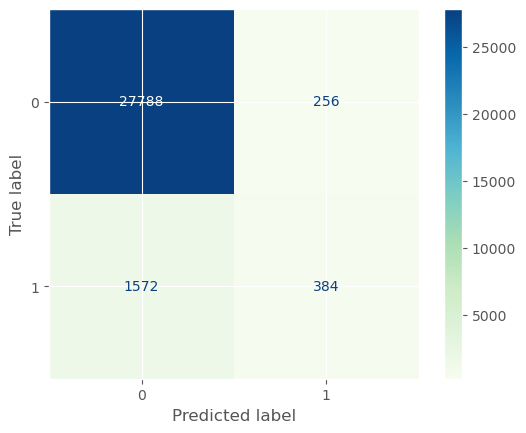

In [51]:
ConfusionMatrixDisplay.from_estimator(xgb_model_3, X_test, y_test, cmap='GnBu')
plt.show()

In [52]:
print('Precision: %.3f' % precision_score(y_test, y_pred3))
print('Recall: %.3f' % recall_score(y_test, y_pred3))
print('F1: %.3f' % f1_score(y_test, y_pred3))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred3))

Precision: 0.600
Recall: 0.196
F1: 0.296
Accuracy: 0.939


## xgb model 4

In [53]:
parameters = {
    'max_depth': 4,
    'learning_rate': 0.01,
    'n_estimators': 3000,
    'early_stopping_rounds': 30,
    'min_child_weight':8,
    'gamma': 0.32,
    'subsample':0.52,
    'colsample_bytree':0.62,
    'reg_alpha':0.54,
    'reg_lambda':0.88,
    'random_state':42
}

In [54]:
xgb_model_4 = XGBClassifier(**parameters)

In [55]:
%%time

xgb_model_4.fit(
          X_train,
          y_train,
          eval_set=[(X_test, y_test)],
)

[0]	validation_0-logloss:0.27470
[1]	validation_0-logloss:0.27342
[2]	validation_0-logloss:0.27224
[3]	validation_0-logloss:0.27112
[4]	validation_0-logloss:0.26983
[5]	validation_0-logloss:0.26851
[6]	validation_0-logloss:0.26741
[7]	validation_0-logloss:0.26612
[8]	validation_0-logloss:0.26484
[9]	validation_0-logloss:0.26358
[10]	validation_0-logloss:0.26246
[11]	validation_0-logloss:0.26127
[12]	validation_0-logloss:0.26010
[13]	validation_0-logloss:0.25901
[14]	validation_0-logloss:0.25788
[15]	validation_0-logloss:0.25706
[16]	validation_0-logloss:0.25604
[17]	validation_0-logloss:0.25509
[18]	validation_0-logloss:0.25427
[19]	validation_0-logloss:0.25320
[20]	validation_0-logloss:0.25215
[21]	validation_0-logloss:0.25110
[22]	validation_0-logloss:0.25020
[23]	validation_0-logloss:0.24948
[24]	validation_0-logloss:0.24850
[25]	validation_0-logloss:0.24763
[26]	validation_0-logloss:0.24672
[27]	validation_0-logloss:0.24586
[28]	validation_0-logloss:0.24498
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.62, device=None, early_stopping_rounds=30,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.32, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=8, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=3000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [56]:
y_pred4 = xgb_model_4.predict(X_test)

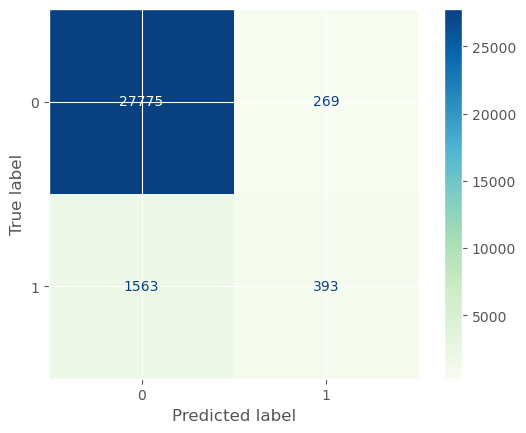

In [57]:
ConfusionMatrixDisplay.from_estimator(xgb_model_4, X_test, y_test, cmap='GnBu')
plt.show()

In [58]:
print('Precision: %.3f' % precision_score(y_test, y_pred4))
print('Recall: %.3f' % recall_score(y_test, y_pred4))
print('F1: %.3f' % f1_score(y_test, y_pred4))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred4))

Precision: 0.594
Recall: 0.201
F1: 0.300
Accuracy: 0.939


# CatBoost: 

## ctb model 1 default param

In [59]:
params = {'verbose':100,
          'random_seed':42,
         }

In [60]:
cbt_model_1 = CatBoostClassifier(**params)

In [61]:
cbt_model_1.fit(
          X_train,
          y_train,
          eval_set=[(X_test, y_test)],
)

Learning rate set to 0.103387
0:	learn: 0.5649059	test: 0.5647954	best: 0.5647954 (0)	total: 72.7ms	remaining: 1m 12s
100:	learn: 0.1736106	test: 0.1745778	best: 0.1745778 (100)	total: 2.38s	remaining: 21.2s
200:	learn: 0.1695734	test: 0.1745259	best: 0.1743282 (127)	total: 4.69s	remaining: 18.6s
300:	learn: 0.1660464	test: 0.1751815	best: 0.1743282 (127)	total: 6.86s	remaining: 15.9s
400:	learn: 0.1632035	test: 0.1757587	best: 0.1743282 (127)	total: 9.24s	remaining: 13.8s
500:	learn: 0.1602642	test: 0.1759729	best: 0.1743282 (127)	total: 11.5s	remaining: 11.4s
600:	learn: 0.1577845	test: 0.1764397	best: 0.1743282 (127)	total: 13.8s	remaining: 9.13s
700:	learn: 0.1553787	test: 0.1769565	best: 0.1743282 (127)	total: 16s	remaining: 6.83s
800:	learn: 0.1530259	test: 0.1773839	best: 0.1743282 (127)	total: 18.3s	remaining: 4.54s
900:	learn: 0.1508136	test: 0.1778554	best: 0.1743282 (127)	total: 20.6s	remaining: 2.26s
999:	learn: 0.1487229	test: 0.1783020	best: 0.1743282 (127)	total: 22.9s	r

In [62]:
y_pred_cbt_1 = cbt_model_1.predict(X_test)

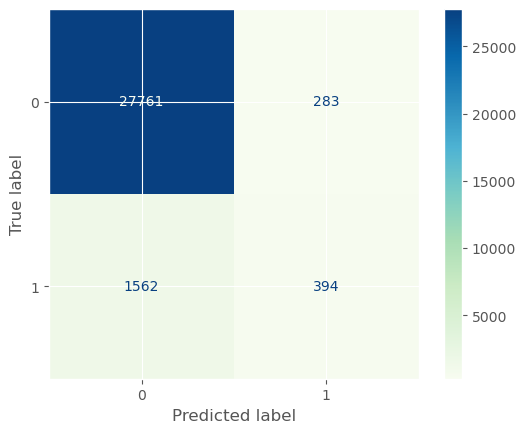

In [63]:
ConfusionMatrixDisplay.from_estimator(cbt_model_1, X_test, y_test, cmap='GnBu')
plt.show()

In [64]:
print('Precision: %.3f' % precision_score(y_test, y_pred_cbt_1))
print('Recall: %.3f' % recall_score(y_test, y_pred_cbt_1))
print('F1: %.3f' % f1_score(y_test, y_pred_cbt_1))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_cbt_1))

Precision: 0.582
Recall: 0.201
F1: 0.299
Accuracy: 0.939


## ctb model 2

In [65]:
params = {
    'iterations':5000,
    'verbose':300,
    'od_type' : "Iter",
    'od_wait' : 500,
    'learning_rate':0.01,
    'random_seed':42
}

In [66]:
cbt_model_2 = CatBoostClassifier(**params)

In [67]:
cbt_model_2.fit(
          X_train,
          y_train,
          eval_set=[(X_test, y_test)],
)

0:	learn: 0.6796407	test: 0.6796390	best: 0.6796390 (0)	total: 28.3ms	remaining: 2m 21s
300:	learn: 0.1797146	test: 0.1776738	best: 0.1776738 (300)	total: 7.67s	remaining: 1m 59s
600:	learn: 0.1758961	test: 0.1749757	best: 0.1749757 (600)	total: 15s	remaining: 1m 49s
900:	learn: 0.1742973	test: 0.1744219	best: 0.1744219 (900)	total: 23.2s	remaining: 1m 45s
1200:	learn: 0.1729617	test: 0.1741428	best: 0.1741428 (1200)	total: 34.3s	remaining: 1m 48s
1500:	learn: 0.1716232	test: 0.1741243	best: 0.1740991 (1411)	total: 43.3s	remaining: 1m 41s
1800:	learn: 0.1705302	test: 0.1741352	best: 0.1740991 (1411)	total: 50.9s	remaining: 1m 30s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.1740990727
bestIteration = 1411

Shrink model to first 1412 iterations.


In [68]:
y_pred_cbt_2 = cbt_model_2.predict(X_test)

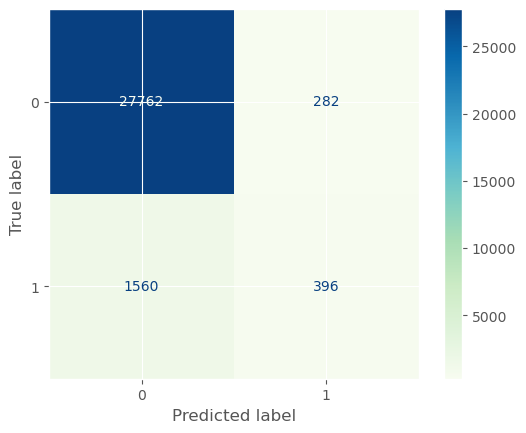

In [69]:
ConfusionMatrixDisplay.from_estimator(cbt_model_2, X_test, y_test, cmap='GnBu')
plt.show()

In [70]:
print('Precision: %.3f' % precision_score(y_test, y_pred_cbt_2))
print('Recall: %.3f' % recall_score(y_test, y_pred_cbt_2))
print('F1: %.3f' % f1_score(y_test, y_pred_cbt_2))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred_cbt_2))

Precision: 0.584
Recall: 0.202
F1: 0.301
Accuracy: 0.939


In [71]:
cbt_model_2.get_feature_importance(prettified=True)

,Feature Id,Importances
0,RevolvingUtilizationOfUnsecuredLines,34.143958
1,NumberOfTime30-59DaysPastDueNotWorse,14.996130
2,NumberOfTimes90DaysLate,11.884377
3,age,9.769447
4,NumberOfTime60-89DaysPastDueNotWorse,7.097483
5,NumberOfOpenCreditLinesAndLoans,6.707476
6,DebtRatio,6.580932
7,MonthlyIncome,3.800257
8,NumberRealEstateLoansOrLines,3.643320
9,NumberOfDependents,1.376621


# Summary:

In [72]:
Precision: 0.595
Recall: 0.204
F1: 0.304
Accuracy: 0.939

In [73]:
result = { 'metrics':['Precision','Recall','F1','Accuracy'],
          'xgb_model_1':
              [0.523,
               0.196,
               0.287,
               0.936],
          'xgb_model_2':
              [0.623,
               0.198,
               0.301,
               0.940],
           'xgb_model_3':
              [0.590,
               0.196,
               0.295,
               0.939],         
           'xgb_model_4':
              [0.595,
               0.204,
               0.304,
               0.939],
           'cbt_model_1':
              [0.582,
               0.201,
               0.299,
               0.939],
           'cbt_model_2':
               [0.584,
                0.202,
                0.301,
                0.939]
}

In [74]:
result_df = pd.DataFrame.from_dict(result)
result_df.T

,0,1,2,3
metrics,Precision,Recall,F1,Accuracy
xgb_model_1,0.523,0.196,0.287,0.936
xgb_model_2,0.623,0.198,0.301,0.94
xgb_model_3,0.59,0.196,0.295,0.939
xgb_model_4,0.595,0.204,0.304,0.939
cbt_model_1,0.582,0.201,0.299,0.939
cbt_model_2,0.584,0.202,0.301,0.939
